# YouTube Data Collection and Analysis

### Let’s collect data about the trending videos on YouTube to analyze and find what makes a video trend on YouTube.

#### To collect data from YouTube, We need to set up an API.
- Here are the steps you can follow:
- Go to Google Cloud Console.
- Click on the project drop-down at the top, then “New Project”.
- Enter a project name and click “Create”.
- In the Google Cloud Console, navigate to “APIs & Services” > “Library”.
- Search for “YouTube Data API v3” and click on it.
- Click “Enable”.
- Go to “APIs & Services” > “Credentials”.
- Click “+ CREATE CREDENTIALS” and select “API key”.
- Copy the generated API key.


# Importing Dependencies 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from googleapiclient.discovery import build
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Collecting Data 

In [1]:
API_KEY = "Your_api_key"  # Replace this With your copied api key  

def get_trending_videos(api_key, max_results=200):
    # Build the YouTube service
    youtube = build('youtube', 'v3', developerKey=api_key)
    
    # Initialize the list to hold the video details
    videos = []

    # Fetch the most popular videos
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        chart='mostPopular',
        regionCode='IN',  # region code
        maxResults=50
    )

    # Paginate through the results if max_results > 50
    while request and len(videos) < max_results:
        response = request.execute()
        
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count': item['statistics'].get('dislikeCount', 0),
                'favorite_count': item['statistics'].get('favoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)
            }
            videos.append(video_details)

        # Get the next page token for pagination
        request = youtube.videos().list_next(request, response)

    return videos[:max_results]

def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def main():
    trending_videos = get_trending_videos(API_KEY)
    filename = 'trending_videos.csv'
    save_to_csv(trending_videos, filename)
    print(f'Trending videos saved to {filename}')

if __name__ == '__main__':
    main()


Trending videos saved to trending_videos.csv



#### In the above code, we are using the YouTube Data API to fetch details of the top 200 trending videos in theIndiaS. 

We iterate through the API’s paginated responses to collect video details such as:
- Title
- Description
- Published date
- Channel information
- Tags
- Duration
- Definition
- Captions
- Various engagement metrics like views, likes, and comments.

The script compiles this information into a list, converts it into a pandas DataFrame, and saves the data to a CSV file named `trending_videos.csv`. This allows us to analyze trends and patterns in the collected video data.
```

# Checking Data : 

In [2]:
trending_videos = pd.read_csv('trending_videos.csv')
print(trending_videos.head())

      video_id                                              title  \
0  EiNlWJfXKlU  Kabhi Main Kabhi Tum Episode 33 | Fahad Mustaf...   
1  4oCkWizuxSc              Making Of A Bhojpuri Film | Purav Jha   
2  shJdvQ8_oew  Every Indian Diwali Ever - Free Fire MAX Editi...   
3  -TVTW9AQvFY  Kabhi Main Kabhi Tum Episode 32 | Fahad Mustaf...   
4  KPYq0dI0wyc  LAKSHMIJI NI AARTI - 2024 - Utaro Aarti Maa La...   

                                         description          published_at  \
0  Watch all the episode of Kabhi Main Kabhi Tum ...  2024-10-29T16:00:07Z   
1  Earn 2% POPcoins on every UPI spend on POP UPI...  2024-10-27T12:31:42Z   
2  Inki Diwali to Magma Born Bundle ke saath man ...  2024-10-29T06:01:07Z   
3  Watch all the episode of Kabhi Main Kabhi Tum ...  2024-10-28T16:40:59Z   
4  Studio Sangeeta Presents - LAKSHMIJI NI AARTI ...  2024-10-29T00:30:10Z   

                 channel_id             channel_title  category_id  \
0  UC4JCksJF76g_MdzPVBJoC3Q            ARY Dig


### Now, let’s have a quick look at the missing values and data types``

In [3]:
# Check for missing_values 
missing_values = trending_videos.isnull().sum()

# display data types 
data_types = trending_videos.dtypes

missing_values, data_types

(video_id          0
 title             0
 description       4
 published_at      0
 channel_id        0
 channel_title     0
 category_id       0
 tags              0
 duration          0
 definition        0
 caption           0
 view_count        0
 like_count        0
 dislike_count     0
 favorite_count    0
 comment_count     0
 dtype: int64,
 video_id          object
 title             object
 description       object
 published_at      object
 channel_id        object
 channel_title     object
 category_id        int64
 tags              object
 duration          object
 definition        object
 caption             bool
 view_count         int64
 like_count         int64
 dislike_count      int64
 favorite_count     int64
 comment_count      int64
 dtype: object)


#### The description column has 4 missing values. This is minor and can be handled as needed. 

The data types seem appropriate for most columns, but we may need to:
- Convert the `published_at` column to a datetime format.
- Further process the `tags` coes:
```s needed. The data types seem appropriate for most columns, but we may need to convert the published_at column to a datetime format and tags might need further processing. Let’s fix these changes:

In [4]:
# Fill_missing descriptions with "No description" 
trending_videos['description'].fillna('No Description', inplace = True)

# convert published_at to datetime
trending_videos["published_at"] = pd.to_datetime(trending_videos["published_at"])

# convert tags from string representation of list to a actual list 
trending_videos['tags'] = trending_videos['tags'].apply(lambda x : eval(x) if isinstance(x,str) else x )


C:\Users\ashu1\AppData\Local\Temp\ipykernel_23804\3787389347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trending_videos['description'].fillna('No Description', inplace = True)


#### Now, before moving forward with the analysis, let’s have a quick look at the descriptive statistics:

In [5]:
# Descriptive statistics 
descriptive_stats = trending_videos[['view_count', 'like_count', 'dislike_count', 'comment_count']].describe()

descriptive_stats


,view_count,like_count,dislike_count,comment_count
count,1.450000e+02,1.450000e+02,145.0,145.000000
mean,2.881178e+06,1.463992e+05,0.0,7322.641379
std,6.225550e+06,6.725874e+05,0.0,31001.585541
min,4.148900e+04,6.270000e+02,0.0,5.000000
25%,3.711320e+05,6.434000e+03,0.0,172.000000
50%,8.286250e+05,2.441000e+04,0.0,938.000000
75%,2.051804e+06,9.574800e+04,0.0,3440.000000
max,5.393013e+07,7.842837e+06,0.0,298583.000000


##  Distribution of views, likes and comments of all the videos in the data:

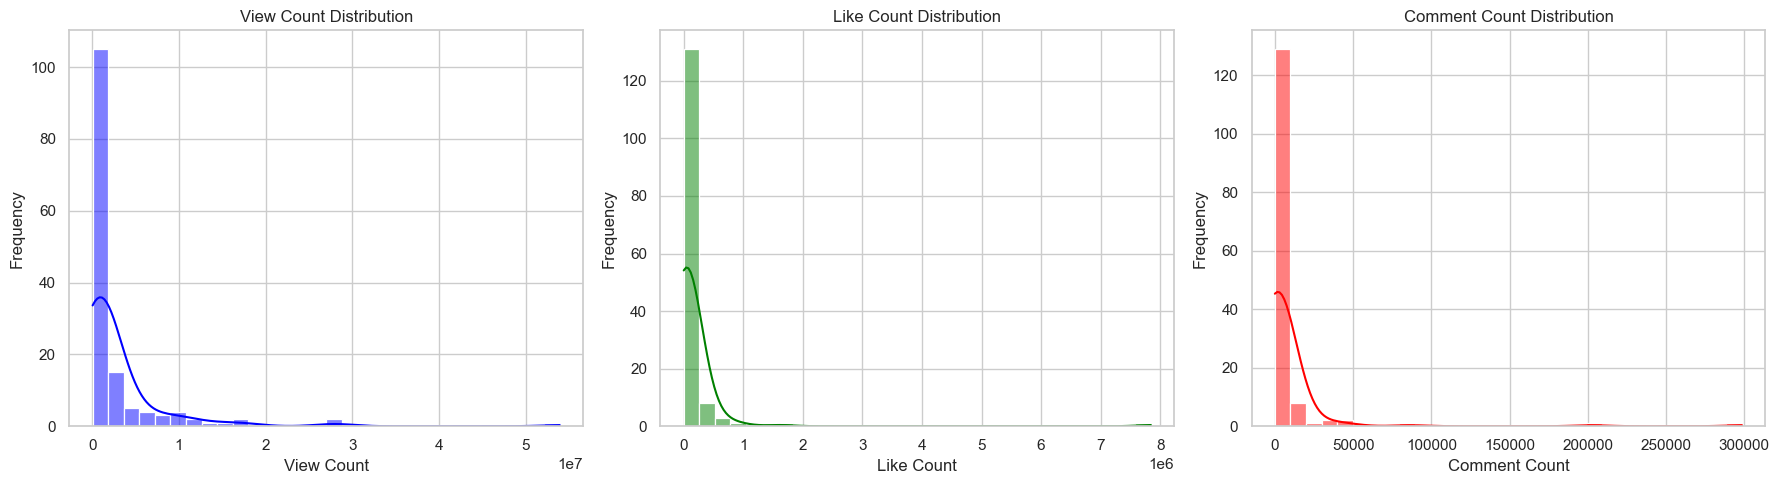

In [6]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# view count distribution
sns.histplot(trending_videos['view_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

# like count distribution
sns.histplot(trending_videos['like_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

# comment count distribution
sns.histplot(trending_videos['comment_count'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- The histograms reveal that the distributions of view counts, like counts, and comment counts are right-skewed, with the majority of films having lower counts and a few having extremely high counts. Now, let's look at the relationship between likes, views, and comments:

# Correlation between likes, views, and comments:

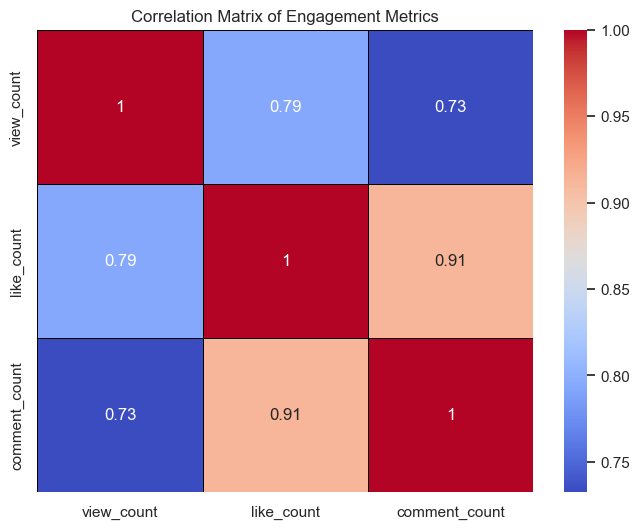

In [7]:
# correlation matrix
correlation_matrix = trending_videos[['view_count', 'like_count', 'comment_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

The heatmap confirms strong positive correlations between views, likes, and comments.

We have only collected the category ID of the video and not the category name. So, let’s collect the category names as well to analyze the categories of the trending videos:

In [8]:
API_KEY = 'Your_api_key'  #
youtube = build('youtube', 'v3', developerKey=API_KEY)

def get_category_mapping():
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode='US'
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

# get the category mapping
category_mapping = get_category_mapping()
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


## Now, here’s how we can analyze the number of trending videos by category:

C:\Users\ashu1\AppData\Local\Temp\ipykernel_23804\1211282388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')


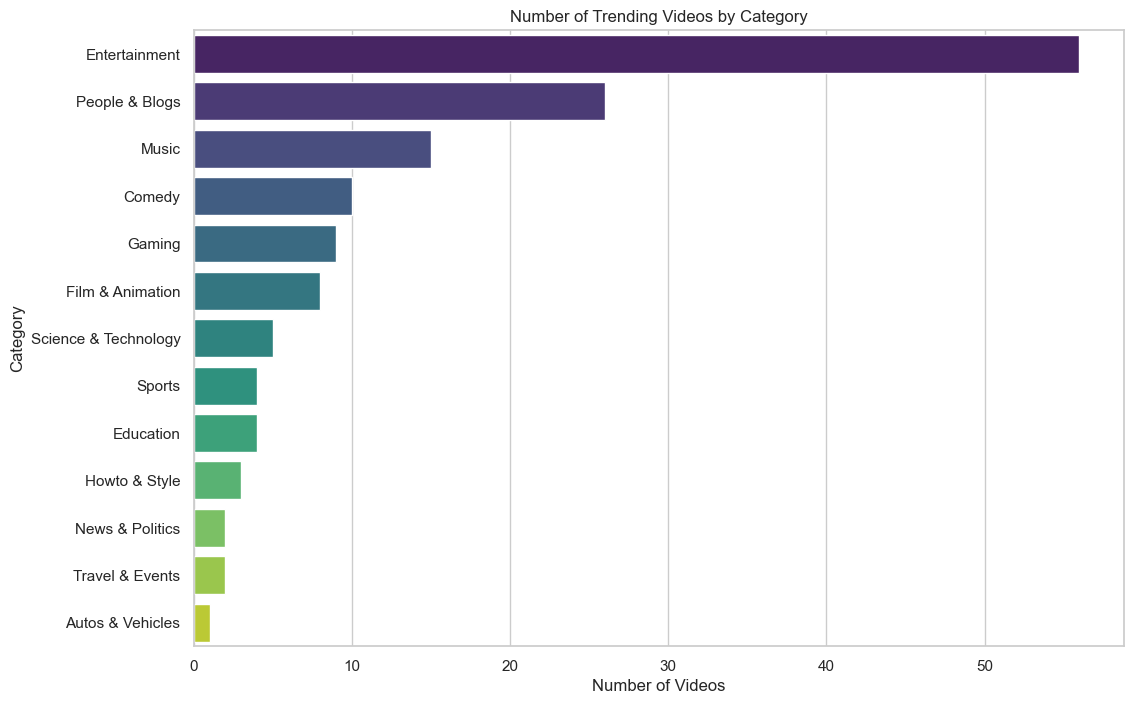

In [9]:
trending_videos['category_name'] = trending_videos['category_id'].map(category_mapping)

# Bar chart for category counts
plt.figure(figsize=(12, 8))
sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')
plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

The bar chart shows that the  Entertainment, people and blogs and Music categories have the highest number of trending videos. 

## Now, let’s have a look at the average engagement metrics by category:

C:\Users\ashu1\AppData\Local\Temp\ipykernel_23804\2552900410.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
C:\Users\ashu1\AppData\Local\Temp\ipykernel_23804\2552900410.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
C:\Users\ashu1\AppData\Local\Temp\ipykernel_23804\2552900410.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_e

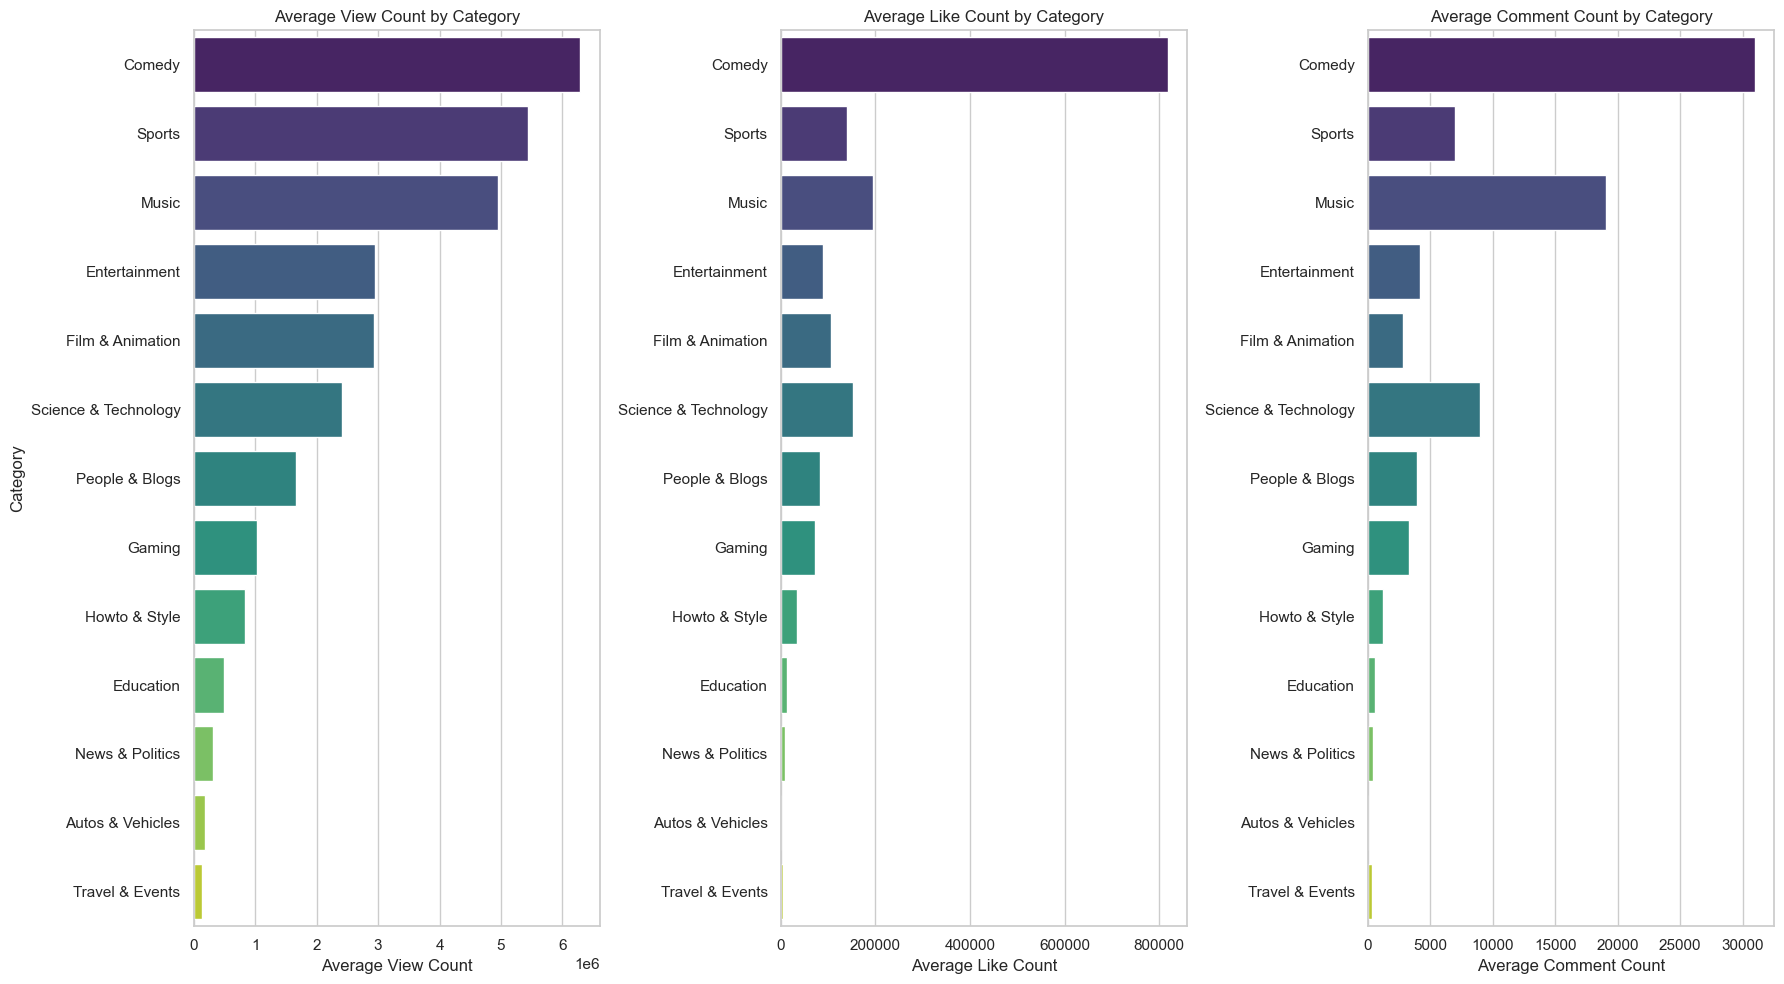

In [10]:
# average engagement metrics by category
category_engagement = trending_videos.groupby('category_name')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# view count by category
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')

# like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis')
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

Comedy and Sports categories have the highest average view counts, likes, and comments. Music & Entertainment also shows high engagement, especially in view counts and like counts.

# Now, let’s analyze the content and duration of the videos.
But first, we need to convert the duration from ISO 8601 format to seconds:

In [11]:
# !pip install isodate
import isodate

# convert ISO 8601 duration to seconds
trending_videos['duration_seconds'] = trending_videos['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

trending_videos['duration_range'] = pd.cut(trending_videos['duration_seconds'], bins=[0, 300, 600, 1200, 3600, 7200], labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min'])

- In the above code, we are using the isodate library to convert the duration of each video from the ISO 8601 format to seconds, which allows for numerical analysis. After converting the durations, we are categorizing the videos into different duration ranges (0-5 minutes, 5-10 minutes, 10-20 minutes, 20-60 minutes, and 60-120 minutes) by creating a new column called duration_range. This categorization enables us to analyze and compare the engagement metrics of videos within specific length intervals, providing insights into how video length influences viewer behaviour and video performance.

## Now lets analyze the content and duration of videos 

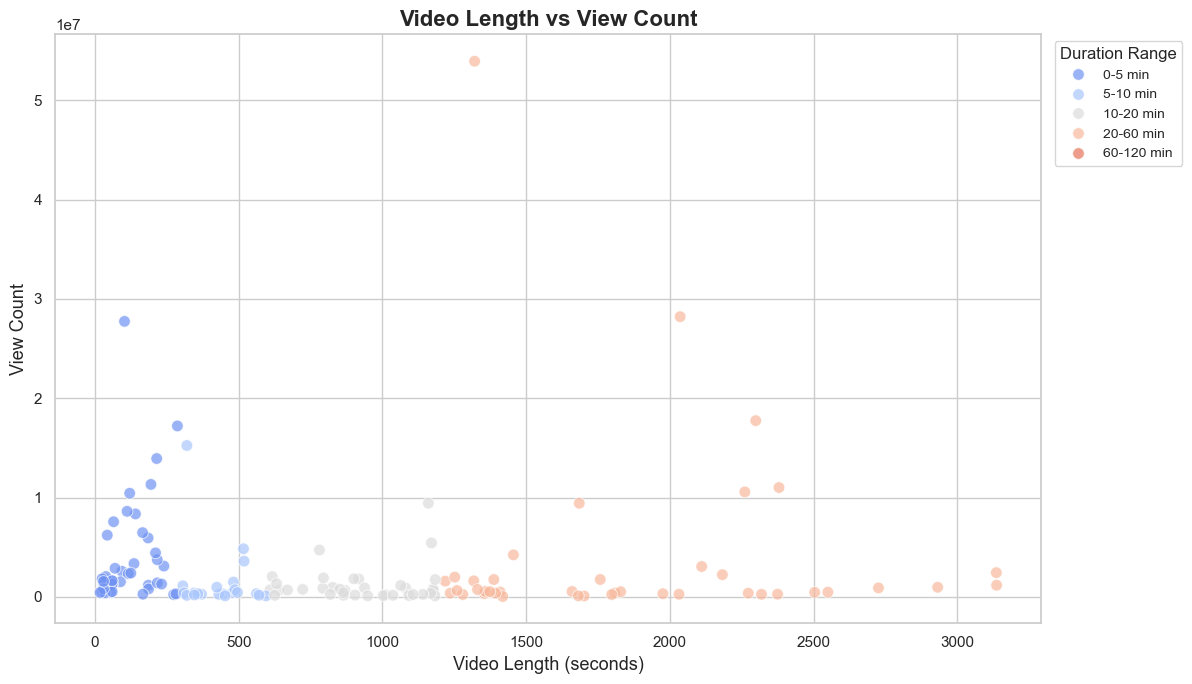

C:\Users\ashu1\AppData\Local\Temp\ipykernel_23804\390838639.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()
C:\Users\ashu1\AppData\Local\Temp\ipykernel_23804\390838639.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ashu1\AppData\Local\Temp\ipykernel_23804\390838639.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ashu1\AppData\Local\Temp\ipykernel_23804

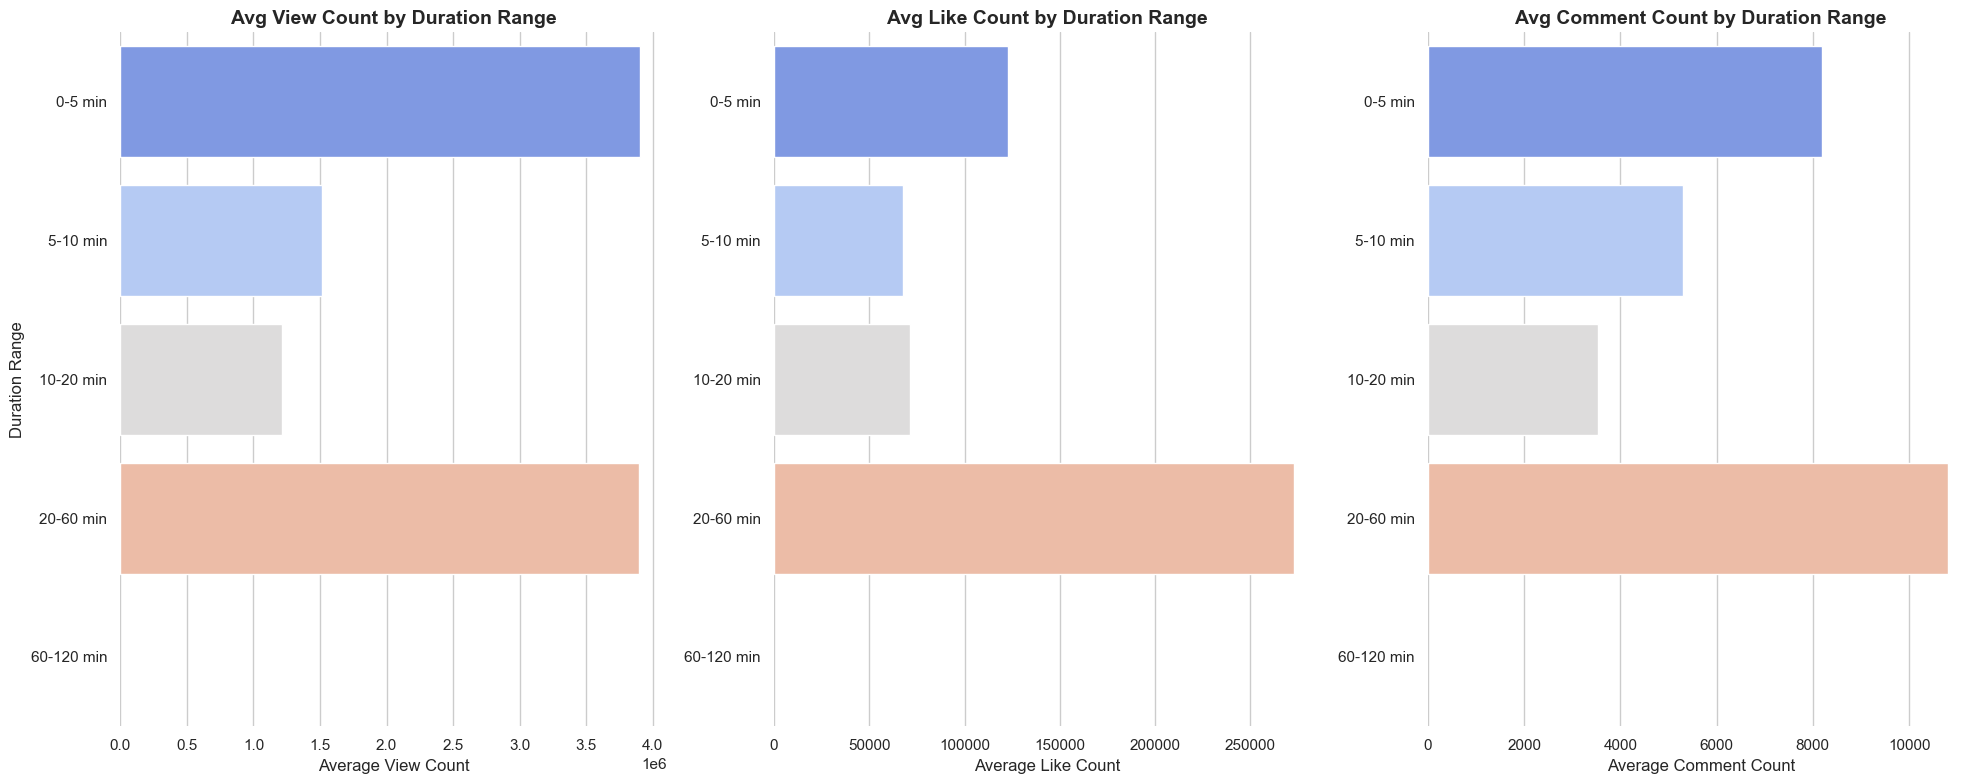

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a clean and professional style with Seaborn
sns.set_theme(style="whitegrid")

# Scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='duration_seconds', 
    y='view_count', 
    data=trending_videos, 
    alpha=0.7,
    hue='duration_range',  
    palette='coolwarm',   # New color palette for improved visibility
    edgecolor="w",        # White edge around points
    s=70                  # Larger point size for better visibility
)

plt.title('Video Length vs View Count', fontsize=16, weight='bold')
plt.xlabel('Video Length (seconds)', fontsize=13)
plt.ylabel('View Count', fontsize=13)
plt.legend(title='Duration Range', title_fontsize=12, fontsize=10, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

# Bar charts for engagement metrics
length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()

fig, axes = plt.subplots(1, 3, figsize=(20, 8))
plt.subplots_adjust(wspace=0.3)  # Space between subplots for clarity

# View count by duration range
sns.barplot(
    y=length_engagement.index, 
    x=length_engagement['view_count'], 
    ax=axes[0], 
    palette='coolwarm'
)
axes[0].set_title('Avg View Count by Duration Range', fontsize=14, weight='bold')
axes[0].set_xlabel('Average View Count', fontsize=12)
axes[0].set_ylabel('Duration Range', fontsize=12)

# Like count by duration range
sns.barplot(
    y=length_engagement.index, 
    x=length_engagement['like_count'], 
    ax=axes[1], 
    palette='coolwarm'
)
axes[1].set_title('Avg Like Count by Duration Range', fontsize=14, weight='bold')
axes[1].set_xlabel('Average Like Count', fontsize=12)
axes[1].set_ylabel('')

# Comment count by duration range
sns.barplot(
    y=length_engagement.index, 
    x=length_engagement['comment_count'], 
    ax=axes[2], 
    palette='coolwarm'
)
axes[2].set_title('Avg Comment Count by Duration Range', fontsize=14, weight='bold')
axes[2].set_xlabel('Average Comment Count', fontsize=12)
axes[2].set_ylabel('')

# Remove spines for a cleaner look
for ax in axes:
    sns.despine(ax=ax, left=True, bottom=True)

plt.tight_layout()
plt.show()


According to the data, shorter videos (0-5 minutes) have the highest engagement in terms of views, likes, and comments, indicating broad popularity. Longer videos (20-60 minutes) receive more likes and comments, showing substantial engagement within a certain audience. Mid-length videos (5-20 minutes) tend to have lower engagement, implying that they lack both the instant attraction of short content and the depth of longer content. This demonstrates that very brief or selectively long videos provide the best engagement.


## Relationship between views and number of tags used in the video:

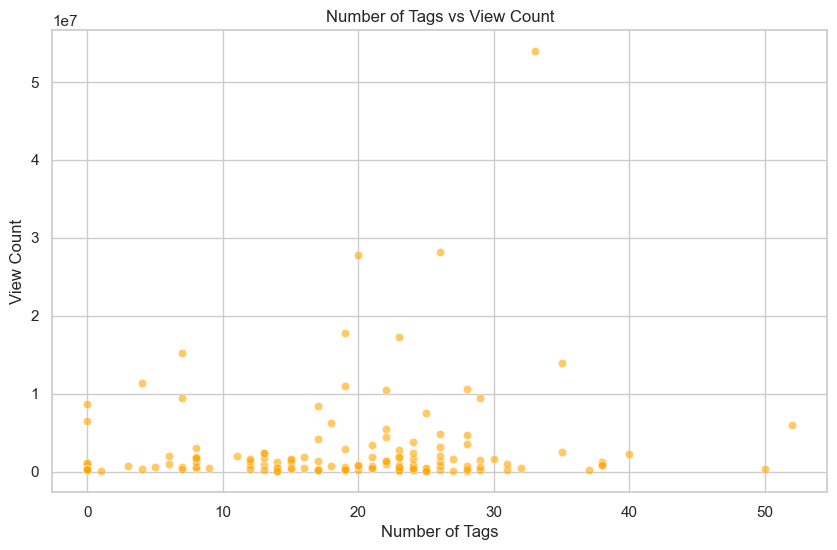

In [20]:
# calculate the number of tags for each video
trending_videos['tag_count'] = trending_videos['tags'].apply(len)

# scatter plot for number of tags vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tag_count', y='view_count', data=trending_videos, alpha=0.6, color='orange')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count')
plt.show()

This scatter plot shows that the amount of tags has no clear association with the number of views. Videos with varied tag counts, ranging from low to high, tend to cluster around comparable view counts, with no clear trend indicating that more tags regularly contribute to higher views. A few videos with greater view counts are spread throughout different tag ranges, indicating that tag count alone may not have a substantial impact on video popularity.

## Now, let’s see if there’s an impact of the time a video is posted on its views:

C:\Users\ashu1\AppData\Local\Temp\ipykernel_23804\2232992994.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')


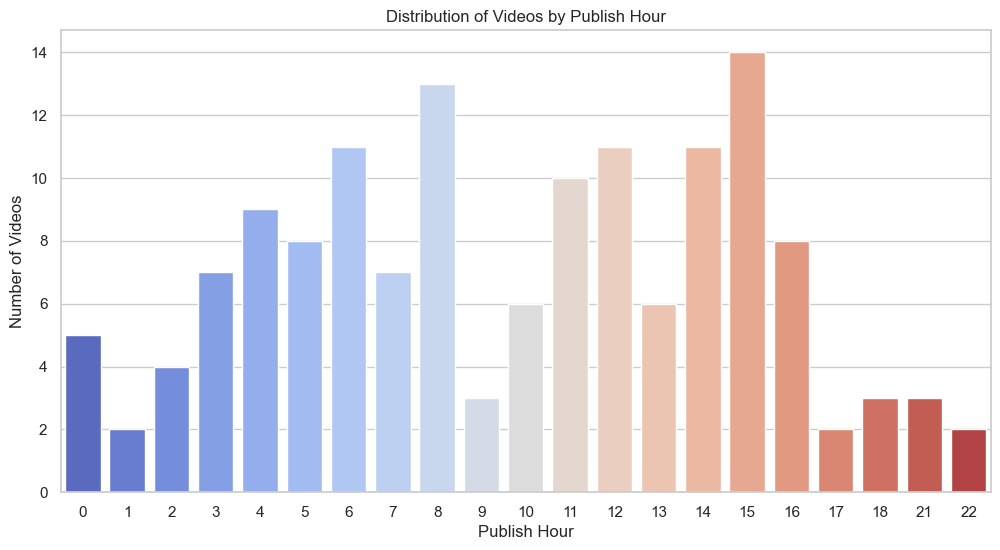

In [22]:
# extract hour of publication
trending_videos['publish_hour'] = trending_videos['published_at'].dt.hour

# bar chart for publish hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')
plt.show()

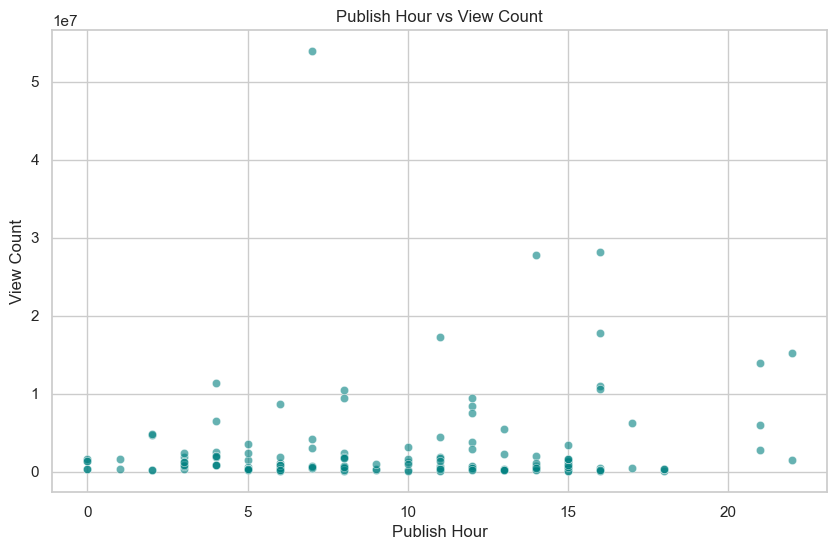

In [23]:

# scatter plot for publish hour vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_hour', y='view_count', data=trending_videos, alpha=0.6, color='teal')
plt.title('Publish Hour vs View Count')
plt.xlabel('Publish Hour')
plt.ylabel('View Count')
plt.show()

The data indicates two peak upload times: approximately 8 a.m. and 7 p.m. , indicating when authors are most active.


# Conclusion

### what makes a video trend on YouTube:

- Encourage viewers to like and comment on videos to boost engagement metrics.
- Aim to create videos (under 15 minutes) for higher engagement, especially for categories like Comedy and Sports.
- Schedule video uploads around peak times (Around 8 A.M. and 7 P.M.) to maximize initial views and engagement.

